In [1]:
%run imports.ipynb

In [2]:
from sklearn import datasets

In [3]:
def generate(shape, n_samples, randomize=42, outliers_fraction = 0):
    if (shape == "blobs"):
        x,y = datasets.make_blobs(n_samples=n_samples, random_state=randomize)
        vec = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        return np.dot(x, vec), y
    if (shape == "jinjang"):
        theta = np.sqrt(np.random.rand(n_samples))*2*np.pi # np.linspace(0,2*pi,100)
        r_a = 2.5*theta + np.pi
        data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T 
        x_a = data_a + np.random.randn(n_samples,2)
        r_b = -2.5*theta - np.pi
        data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
        x_b = data_b + np.random.randn(n_samples,2)
        res_a = np.append(x_a, np.zeros((n_samples,1)), axis=1)
        res_b = np.append(x_b, np.ones((n_samples,1)), axis=1)
        res = np.append(res_a, res_b, axis=0)
        np.random.shuffle(res)
        return res[:,:2], res[:,2]
    if (shape == "noisy_jinjang"):
        n_outliers = int(outliers_fraction * n_samples)
        n_inliers = n_samples - n_outliers
        theta = np.sqrt(np.random.rand(n_inliers))*2*np.pi # np.linspace(0,2*pi,100)
        r_a = 2.5*theta + np.pi
        data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T 
        x_a = data_a + np.random.randn(n_inliers,2)
        r_b = -2.5*theta - np.pi
        data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
        x_b = data_b + np.random.randn(n_inliers,2)
        res_a = np.append(x_a, np.zeros((n_inliers,1)), axis=1)
        res_b = np.append(x_b, np.ones((n_inliers,1)), axis=1)
        res = np.append(res_a, res_b, axis=0)
        np.random.shuffle(res)
        rng = np.random.RandomState(42)
        X = np.concatenate([res[:,:2], rng.uniform(low=-25, high=25,
                       size=(2*n_outliers, 2))], axis=0)
        return X, res[:,2]
    if (shape == "moons"):
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.07, random_state = randomize)
        return noisy_moons[0], noisy_moons[1]
    if (shape == "noisy_blob"):
        n_outliers = int(outliers_fraction * n_samples)
        n_inliers = n_samples - n_outliers
        X,y = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               random_state=0, n_samples=n_inliers, n_features=2)
        rng = np.random.RandomState(42)
        X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
        return X,y
    if (shape == "noisy_blobs"):
        n_outliers = int(outliers_fraction * n_samples)
        n_inliers = n_samples - n_outliers
        X,y =  make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               random_state=0, n_samples=n_inliers, n_features=2)
        rng = np.random.RandomState(42)
        X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
        return X,y
    if (shape == "noisy_blobs_diff"):
        n_outliers = int(outliers_fraction * n_samples)
        n_inliers = n_samples - n_outliers
        X,y =  make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               random_state=0, n_samples=n_inliers, n_features=2)
        rng = np.random.RandomState(42)
        X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
        return X,y
    if (shape == "noisy_moons"):
        n_outliers = int(outliers_fraction * n_samples)
        n_inliers = n_samples - n_outliers
        X =  4. *(make_moons(n_samples=n_inliers, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25]))
        rng = np.random.RandomState(42)
        X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)
        return X, 1
    if (shape == "aniso"):
        # Anisotropicly distributed data
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
        transformation = [[0.6, -0.6], [-0.4, 0.8]]
        X_aniso = np.dot(X, transformation)
        aniso = (X_aniso, y)
        return aniso

In [4]:
shape = "aniso"
n_samples = 3000
outliers_fraction = 0.05

In [5]:
gen = generate(n_samples=n_samples, shape=shape, outliers_fraction=outliers_fraction)

In [6]:
x=gen[0]
y=gen[1]

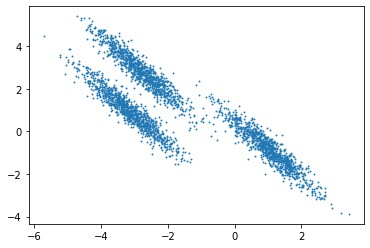

In [7]:
plt.scatter(x[:,0], x[:,1], s= 0.8)